In [1]:
import gym
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

In [3]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100

In [2]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, done, info = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [6]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [7]:
q_table

array([[0.54144231, 0.51850395, 0.5173635 , 0.52035461],
       [0.2690804 , 0.28296557, 0.29764643, 0.50874562],
       [0.43129998, 0.41696614, 0.41744053, 0.47275729],
       [0.3268185 , 0.34568694, 0.3703365 , 0.46252265],
       [0.57263645, 0.34975402, 0.41300836, 0.40625569],
       [0.        , 0.        , 0.        , 0.        ],
       [0.2631156 , 0.14803228, 0.18241971, 0.11626537],
       [0.        , 0.        , 0.        , 0.        ],
       [0.39379015, 0.37214093, 0.41090825, 0.60514798],
       [0.371191  , 0.66948573, 0.53737077, 0.39108022],
       [0.65876819, 0.41392648, 0.37238336, 0.29083984],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.5223013 , 0.5931091 , 0.74541292, 0.4805681 ],
       [0.73807674, 0.8646994 , 0.76805787, 0.76955776],
       [0.        , 0.        , 0.        , 0.        ]])

In [3]:
def play(env, q_table, render=False):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            env.render()
            time.sleep(0.2)
            if not done:
                display.clear_output(wait=True)
        state = next_state

    return (total_reward, steps)

In [4]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [10]:
play_multiple_times(env, q_table, 1000)

Number of successes: 740/1000
Average number of steps: 38.855405405405406


## Define SARSA

In [5]:
def sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        # Choose A from S using policy derived from Q 
        exploration = random.uniform(0,1)
        if exploration < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        for step in range(num_steps_per_episode):
            # Take action A,observe an experience (𝑠,𝑎,𝑟,𝑠′)
            next_state, reward, done, info = env.step(action)
            
            # Choose next action A' from S' using policy derived from Q
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])
            
            # 𝑄(𝑠,𝑎) = 𝑄(𝑠,𝑎) + 𝛼[𝑟 + 𝛾𝑄(𝑠^′,𝑎^′) − 𝑄(𝑠,𝑎)] 
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate*(reward + gamma * q_table[next_state,next_action])

            reward_episode += reward
            state = next_state
            action = next_action

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

## ⏳Performance of Q-Learning and SARSA


### FrozenLake-v0

In [19]:
# Hyperparameters for FrozenLake-v0
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 20000
num_steps_per_episode = 100
env = gym.make('FrozenLake-v0')
time1= time.time()
q_table_FLv0_QL, rewards_all1 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time2= time.time()
q_table_flv0_sarsa, rewards_all2 = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time3= time.time()

Episode 19999 finished
Episode 19999 finished


In [20]:
play_multiple_times(env, q_table_FLv0_QL, 1000)
play_multiple_times(env, q_table_flv0_sarsa, 1000)
print("Time q learning for FrozenLake-v0    :{:.3f}".format(time2-time1))
print("Time sarsa learning for FrozenLake-v0:{:.3f}".format(time3-time2))

Number of successes: 711/1000
Average number of steps: 38.0042194092827
Number of successes: 743/1000
Average number of steps: 38.58411843876178
Time q learning for FrozenLake-v0    :21.664
Time sarsa learning for FrozenLake-v0:11.529


Text(0.5, 1.0, 'H1 - FrozenLake-v0')

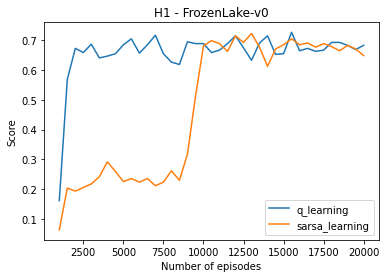

In [21]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(500,20000,500):
  score_history1.append((np.sum(rewards_all1[i-500:i])/500))
  score_history2.append((np.sum(rewards_all2[i-500:i])/500))
# plt.plot(list(range(0, 20000)), rewards_all6)
plt.plot(list(range(500, 20000+1, 500))[1:], score_history1,label='q_learning')
plt.plot(list(range(500, 20000+1, 500))[1:], score_history2,label='sarsa_learning')
# plt.axis([0,2000,-400, 100])
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.title("H1 - FrozenLake-v0")

### nhận xét
💬 ⭐Về performance của Q-Learning và SARSA trên **FrozenLake-v0** có thể thấy về thời gian thì sarsa learning có phần tối ưu hơn 53% 

Kết quả được thể hiện trong H1- FrozenLake-v0 có thể cho thấy Q-learning vượt trội hơn SARSA ở giai đoạn eposode dưới 10000 và SARSA vượt trội hơn so với Q-learning khi num of eposodes tăng lên hơn 10000 

 ▶ Q learning tốt hơn ở trường hợp num_episodes nhỏ và SARSA thì ngược lại khi số num_episodes tăng lên sự cải thiện cũng tăng theo

### FrozenLake8x8-v0

In [21]:
# Hyperparameters for FrozenLake8x8-v0
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.001
epsilon_decay_rate = 0.00005
num_episodes = 250000
num_steps_per_episode = 400

env = gym.make('FrozenLake8x8-v0')
time4= time.time()
q_table_FL8x8v0_QL, rewards_all3 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time4_2= time.time()


Episode 249999 finished


In [24]:
env = gym.make('FrozenLake8x8-v0')
time5= time.time()
q_table_fl8x8v0_sarsa, rewards_all4 = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time6= time.time()

Episode 249999 finished


In [25]:
play_multiple_times(env, q_table_FL8x8v0_QL, 1000)
play_multiple_times(env, q_table_fl8x8v0_sarsa, 1000)
print("Time q learning for FrozenLake8x8-v0    :{:.3f}".format(time4_2-time4))
print("Time sarsa learning for FrozenLake8x8-v0:{:.3f}".format(time6-time5))

Number of successes: 629/1000
Average number of steps: 86.6248012718601
Number of successes: 549/1000
Average number of steps: 84.10018214936248
Time q learning for FrozenLake8x8-v0    :516.610
Time sarsa learning for FrozenLake8x8-v0:303.943


Text(0.5, 1.0, 'H2-FrozenLake8x8-v0')

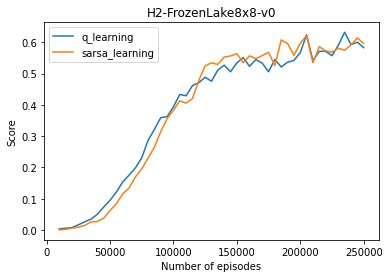

In [41]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(5000,250000,5000):
  score_history1.append((np.sum(rewards_all3[i-5000:i])/5000))
  score_history2.append((np.sum(rewards_all4[i-5000:i])/5000))
# plt.plot(list(range(0, 10000)), rewards_all6)
plt.plot(list(range(5000, 250000+1,5000))[1:], score_history1,label='q_learning')
plt.plot(list(range(5000, 250000+1,5000))[1:], score_history2,label='sarsa_learning')
# plt.axis([0,25000,-400, 150])
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.title("H2-FrozenLake8x8-v0")

### nhận xét
💬 ⭐Về performance của Q-Learning và SARSA trên **FrozenLake8x8-v0** có thể thấy về thời gian thì sarsa learning có phần tối ưu hơn ⁓ 60% 

Kết quả được thể hiện trong H2- FrozenLake8x8-v0 có thể cho thấy Q-learning vượt trội hơn SARSA ở giai đoạn eposode dưới 12000 và SARSA vượt trội hơn so với Q-learning khi num of eposodes tăng lên hơn 12000 

 ▶ Q learning tốt hơn ở trường hợp num_episodes ít hơn (giai đoạn đầu) và SARSA thì ngược lại khi số num_episodes tăng lên sự cải thiện cũng tăng theo

### 🚗Taxi-v3

In [27]:
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005
num_episodes = 10000
num_steps_per_episode = 100
env = gym.make('Taxi-v3')
time7= time.time()
q_table_taxi_QL, rewards_all5 = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time8= time.time()
q_table_taxi_sarsa, rewards_all6 = sarsa_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
time9= time.time()

Episode 9999 finished
Episode 9999 finished


In [28]:
play_multiple_times(env, q_table_taxi_QL, 1000)
play_multiple_times(env, q_table_taxi_sarsa, 1000)
print("Time q learning for taxi-v3    :{:.3f}".format(time8-time7))
print("Time sarsa learning for taxi-v3:{:.3f}".format(time9-time8))

Number of successes: 1000/1000
Average number of steps: 13.069
Number of successes: 1000/1000
Average number of steps: 13.179
Time q learning for taxi-v3    :5.428
Time sarsa learning for taxi-v3:3.498


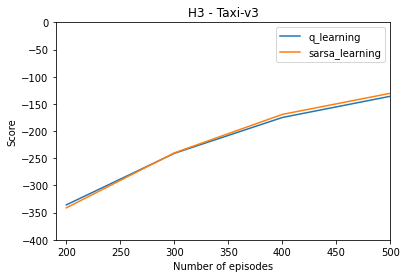

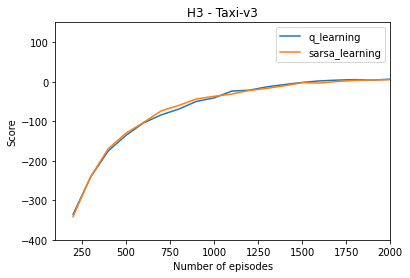

In [40]:
score_history1 =[]
score_history2 =[]
# Plotting score over time
for i in range(100,10000,100):
  score_history1.append((np.sum(rewards_all5[i-100:i])/100))
  score_history2.append((np.sum(rewards_all6[i-100:i])/100))
# plt.plot(list(range(0, 10000)), rewards_all6)
plt.plot(list(range(100, 10000+1, 100))[1:], score_history1,label='q_learning')
plt.plot(list(range(100, 10000+1, 100))[1:], score_history2,label='sarsa_learning')
plt.axis([190,500,-400, 0])
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.legend(loc='best')
plt.title("H3 - Taxi-v3")
plt.show()
plt.plot(list(range(100, 10000+1, 100))[1:], score_history1,label='q_learning')
plt.plot(list(range(100, 10000+1, 100))[1:], score_history2,label='sarsa_learning')
plt.axis([100,2000,-400, 150])
plt.ylabel('Score')
plt.xlabel('Number of episodes')
plt.legend(loc='best')
plt.title("H3 - Taxi-v3")
plt.show()

### nhận xét
💬 ⭐Về performance của Q-Learning và SARSA trên **Taxi-v3** có thể thấy về thời gian thì sarsa learning có phần tối ưu hơn 62,9% 

Kết quả được thể hiện trong H3-Taxi-v3 có thể cho thấy Q-learning vượt trội hơn SARSA ở giai đoạn eposode dưới 300 và SARSA vượt trội hơn so với Q-learning khi num of eposodes tăng lên hơn 300

 ▶ Q learning tốt hơn ở trường hợp num_episodes nhỏ và SARSA thì ngược lại khi số num_episodes tăng lên sự cải thiện cũng tăng theo